# 2110433 - Computer Vision (2024/2)
## Lab 4 - Color Processing
In this lab, we will learn to use color feature in different color spaces to extract useful information from images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

Import OpenCV, Numpy and Matplotlib as always

In [1]:
import cv2
import math
import time
import threading
import numpy as np
import random as rng
from matplotlib import pyplot as plt
from ipywidgets import interact,interactive
import ipywidgets as widgets
from IPython.display import display, HTML,clear_output
import IPython.display
%matplotlib inline

from datetime import datetime

## Grayscale Image Thresholding
Thresholding is the simplest method of image segmentation. This non-linear operation converts a grayscale image into a binary image where the two colors (black/white) are assigned to pixels that are below or above the specified threshold. <br>
Lena comes again! Can you adjust both sliders to segment lena's skin?

In [2]:
inputImage = cv2.imread("assets/lena_std.tif",cv2.IMREAD_GRAYSCALE)
def grayscaleThresholding(minValue,maxValue):
    thresholdImage = np.logical_and(inputImage > minValue, inputImage < maxValue)
    inputImageCopy = inputImage.copy()
    cv2.rectangle(inputImageCopy,(250,400),(340,500),255,3)
    cropRegion = inputImage[400:500,250:340]
    
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.title("Lena Image")
    plt.imshow(inputImageCopy, cmap='gray')
    
    plt.subplot(132)
    plt.title("Segmentation Mask")
    plt.imshow(thresholdImage, cmap='gray')
    
    plt.subplot(133)
    plt.title("Pixel Value Distribution")
    plt.hist(cropRegion,range=(0,255))
    plt.show()
interact(grayscaleThresholding, minValue=widgets.IntSlider(min=0,max=255,step=1,value=1),maxValue=widgets.IntSlider(min=0,max=255,step=1,value=1));

interactive(children=(IntSlider(value=1, description='minValue', max=255), IntSlider(value=1, description='max…

## Simple Image Segmentation using Color

As you can see from the above sample, only grayscale information is usually not enough to segment "things" from the images. In this section we will apply simple color segmentation on various colorspaces. The following block is code snippet which retrive image from your webcam and apply thresholding on BGR image using defined value.

In [3]:
bMin = 50; bMax = 170
gMin = 70; gMax = 180
rMin = 90; rMax = 220
cameraNo = 0

In [4]:
# You can press "Interupt Kernel Button to stop webcam"
inputStream = cv2.VideoCapture(cameraNo) 
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            outputVideoFrameBGR = videoFrameBGR.copy()

            # Draw ROI
            cv2.rectangle(outputVideoFrameBGR,(100,100),(200,200),(0,255,0),3)
            # Cropped Region
            croppedRegion = videoFrameBGR[100:200,100:200,:]
            
           
            
            mask = cv2.inRange(videoFrameBGR,(bMin,gMin,rMin),(bMax,gMax,rMax))[:,:,np.newaxis]
            mask = np.repeat(mask,3,axis=2)
            
            ## Draw Min/Max pixel value in BGR order on image
            cv2.putText(outputVideoFrameBGR,str(np.min(croppedRegion[:,:,0]))+'/'+str(np.min(croppedRegion[:,:,1]))+'/'+str(np.min(croppedRegion[:,:,2])),(20,20),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,255))
            cv2.putText(outputVideoFrameBGR,str(np.max(croppedRegion[:,:,0]))+'/'+str(np.max(croppedRegion[:,:,1]))+'/'+str(np.max(croppedRegion[:,:,2])),(20,50),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,255))
            
            outputVideoFrameBGR = np.hstack((outputVideoFrameBGR,mask))
            
            # Encode image as jpg numpy array
            _, buf = cv2.imencode(".jpg", outputVideoFrameBGR)
            # Draw result
            IPython.display.display(IPython.display.Image(data=buf))
        
            clear_output(wait=True) 
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()

Stream stopped


Since the slider widget does not support for-loop webcam retrival method that we use, we may use build-in OpenCV GUI library to create a color range slider by using the following code. (The window name <b>"Color Segmentation"</b> will popup!)

In [5]:
def sliderCallback(x):
    pass
# Create a OpenCV Window
windowName = 'Color Segmentation'
cv2.namedWindow(windowName)
cv2.createTrackbar('bMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('gMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('rMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('bMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('gMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('rMax',windowName,0,255,sliderCallback)

inputStream = cv2.VideoCapture(cameraNo) 
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            
            
            bMin = cv2.getTrackbarPos('bMin',windowName)
            gMin = cv2.getTrackbarPos('gMin',windowName)
            rMin = cv2.getTrackbarPos('rMin',windowName)
            
            bMax = cv2.getTrackbarPos('bMax',windowName)
            gMax = cv2.getTrackbarPos('gMax',windowName)
            rMax = cv2.getTrackbarPos('rMax',windowName)
            
            mask = cv2.inRange(videoFrameBGR,(bMin,gMin,rMin),(bMax,gMax,rMax))[:,:,np.newaxis]
            mask = np.repeat(mask,3,axis=2)
            outputVideoFrameBGR = videoFrameBGR.copy()
            outputVideoFrameBGR = np.hstack((outputVideoFrameBGR,mask))
            
            cv2.imshow(windowName,outputVideoFrameBGR)
            if cv2.waitKey(1) == ord('q'):
                cv2.destroyAllWindows()
                break
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()
cv2.destroyAllWindows()

Stream stopped


OpenCV supports many well-known colorspaces. You can apply the colorspace transformation by using <a href="https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga397ae87e1288a81d2363b61574eb8cab">cv2.cvtColor</a> and see the list of suppoted transformation flags <a href="https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga4e0972be5de079fed4e3a10e24ef5ef0">here</a>. Try tp apply color segmention on any object in other colorspace <b>(NOT BGR!!)</b> by fill the following block.

In [6]:
def sliderCallback(x):
    pass

windowName = 'YCbCr Skin Detection'
cv2.namedWindow(windowName)

# Create Trackbars for YCbCr Thresholds
cv2.createTrackbar('Cb Min', windowName, 0, 255, sliderCallback)
cv2.createTrackbar('Cr Min', windowName, 0, 255, sliderCallback)
cv2.createTrackbar('Cb Max', windowName, 255, 255, sliderCallback)
cv2.createTrackbar('Cr Max', windowName, 255, 255, sliderCallback)

cameraNo = 0
inputStream = cv2.VideoCapture(cameraNo)

try:
    while True:
        ret, videoFrameBGR = inputStream.read()
        if not ret or videoFrameBGR is None:
            print("Cannot Open Webcam, hardware issue?")
            break
        
        # Convert BGR to YCbCr
        videoFrameYCbCr = cv2.cvtColor(videoFrameBGR, cv2.COLOR_BGR2YCrCb)

        # Extract the Cb and Cr channels
        Y, Cr, Cb = cv2.split(videoFrameYCbCr)

        # Get Threshold values from trackbars
        cbMin = cv2.getTrackbarPos('Cb Min', windowName)
        crMin = cv2.getTrackbarPos('Cr Min', windowName)
        cbMax = cv2.getTrackbarPos('Cb Max', windowName)
        crMax = cv2.getTrackbarPos('Cr Max', windowName)

        # Create a mask based on Cb & Cr values
        mask = cv2.inRange(videoFrameYCbCr, (0, crMin, cbMin), (255, crMax, cbMax))

        # Apply mask to extract the skin region
        segmentedOutput = cv2.bitwise_and(videoFrameBGR, videoFrameBGR, mask=mask)

        # Show original, mask, and result side by side
        outputVideoFrame = np.hstack((videoFrameBGR, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), segmentedOutput))

        # Display results
        cv2.imshow(windowName, outputVideoFrame)

        # Press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    print("Stream stopped")

# Release Video Stream & Close Windows
inputStream.release()
cv2.destroyAllWindows()

2025-01-30 21:21:30.914 python[32307:765943] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-30 21:21:30.914 python[32307:765943] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Stream stopped


## Morphological Transformations

The field of mathematical morphology contributes a wide range of operators to image processing, all based around a simple mathematical concepts from set theory. Morphological transformations are the operations based on the image shape employed on binay images. This operation needs needs two inputs, one is binary image, second one is called <b>structuring element or kernel</b> which decides the operation output. You can design the kernel to suit your application needs. Two basic morphological operators are Erosion and Dilation

The following mask image is segmented by using color information. You can see that there are some hand's pixels which are not connect into a perfect hand shape. We can correct these by using the basic morphological operaters.

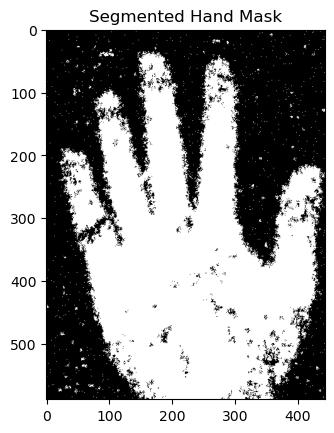

In [7]:
handMask = cv2.imread('assets/Lab4-SegmentedHand.png',cv2.IMREAD_GRAYSCALE)
plt.title('Segmented Hand Mask')
plt.imshow(handMask,cmap='gray')
plt.show()

In [8]:
def openAndCloseMorph(kernelSize,kernelShape, morphType):
    kernel = cv2.getStructuringElement(kernelShape,(kernelSize,kernelSize))

    outputImage = handMask.copy()
    
    if morphType == 'erode':
        outputImage = cv2.erode(outputImage,kernel,iterations = 1)
    else:
        outputImage = cv2.dilate(outputImage,kernel,iterations = 1)

    plt.figure(figsize=(5,5))
    plt.imshow(outputImage, cmap='gray')
    plt.show()
    
    print('Morphology Kernel Shape:')
    display(kernel)
    
interact(openAndCloseMorph, kernelSize=widgets.IntSlider(min=1,max=11,step=1,value=1), 
         kernelShape=widgets.Dropdown(
                        options=[cv2.MORPH_RECT,cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS],
                        value=cv2.MORPH_RECT,
                        description='kernelShape:',
                        disabled=False),
        morphType=widgets.Dropdown(
                        options=['erode','dilate'],
                        value='erode',
                        description='Morph Type:',
                        disabled=False)
);

interactive(children=(IntSlider(value=1, description='kernelSize', max=11, min=1), Dropdown(description='kerne…

This <a href="https://docs.opencv.org/3.4.2/d9/d61/tutorial_py_morphological_ops.html">page</a> shows a good morphological operation exmple, try to write an interactive visualization like the above sample on <b>Opening and Closing</b> operations. See the output results by yourself.

In [9]:
### FILL HERE ###
def openAndCloseMorphEx(kernelSize,kernelShape, morphType):
    kernel = cv2.getStructuringElement(kernelShape,(kernelSize,kernelSize))

    outputImage = handMask.copy()
    
    if morphType == 'opening':
        outputImage = cv2.morphologyEx(outputImage, cv2.MORPH_OPEN, kernel)
    else:
        outputImage = cv2.morphologyEx(outputImage, cv2.MORPH_CLOSE, kernel)

    plt.figure(figsize=(5,5))
    plt.imshow(outputImage, cmap='gray')
    plt.show()
    
    print('Morphology Kernel Shape:')
    display(kernel)
    
interact(openAndCloseMorphEx, kernelSize=widgets.IntSlider(min=1,max=11,step=1,value=1), 
         kernelShape=widgets.Dropdown(
                        options=[cv2.MORPH_RECT,cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS],
                        value=cv2.MORPH_RECT,
                        description='kernelShape:',
                        disabled=False),
        morphType=widgets.Dropdown(
                        options=['opening','closing'],
                        value='opening',
                        description='Operation Type:',
                        disabled=False)
);
#################

interactive(children=(IntSlider(value=1, description='kernelSize', max=11, min=1), Dropdown(description='kerne…

## Assignment 1 - Color Based Face Detector <br>

<img src="assets/Lab4-funnyface.gif"/>
By using the knowledge from lecture 1-4, you should be able to write your own simple color based face detector. Use the above code snippets to help you write it. The output should be a code which retrive video feed from <b>your webcam</b> and draw bounding boxes around detected faces. Write the detection results into video file and hand in with this notebook. There should be <b>two video sequences</b>, in good lighting and other lighting condition. The output video should show robustness of your designed alogorithm. (Optional) You will get extra points if you can use <b>same parameters</b> for both sequences.

<b>Basic Guidance:<b>
1. Create a "face color segmentation mask" using your choice colorspace.
2. Filter out the outlier pixel!
3. Categorize each connected component into group by using cv2.findContours (from Lab 3)
4. Find the bounding box which can enclose those connect components by <a href="https://docs.opencv.org/3.4.2/d3/dc0/group__imgproc__shape.html#gacb413ddce8e48ff3ca61ed7cf626a366">cv2.boundingRect</a>

<b>Hints:</b>
- From today lecture, how do to discard noise/fill small hole from color segmentation mask output?
- Since this is a color-based problem, you can use old knowledge from lecture 1-3 to improve segmentation result by apply <b>?</b> on input image
- You can use some specific threshold based on shape properties or simple morphological operations to keep only potential contours
- To achieve a better result for both lighting conditions, you may need to apply some data analysis on the <b>region of interest</b> by plotting each channel value and see their data distributions.
- Internet is your friend. You can search for relavent research papers and use their algorithms/implementations, but you must <b>give proper credits</b> by citing them in this notebook. 

In [10]:
### Describe how your algorithm work here (Thai or English). You can provide any visualization if you want.
'''
1. ใช้ bilateralFilter ในการลด noise แต่พยายามคงให้ขอบรูปยังชัด
    - ใช้พารามิเตอร์ d=9, sigmaColor=75, sigmaSpace=75
    - เลือกใช้เพราะสามารถรักษาขอบของใบหน้าได้ดีกว่า Gaussian blur ทั่วไป

2. เปลี่ยนจากการใช้ RGB เป็น YCrCb เพราะว่าเป็น color space ที่เหมาะกับผิวมนุษย์ที่สุด
    - Y: [0, 255]
    - Cr: [135, 180]
    - Cb: [85, 135]

3. ทำ Skin Mask โดยใช้ cv2.inRange()
    - แปลงเป็นภาพขาวดำที่แยกสีผิวออกจากพื้นหลัง
    - พิกเซลที่เป็นสีผิวจะเป็นสีขาว (255)
    - พิกเซลอื่นๆ จะเป็นสีดำ (0)

4. ทำ Opening กับ Closing เพื่อกำจัด noise
    - Opening (kernel 5x5): ลดจุดรบกวนขนาดเล็ก
    - Closing (kernel 11x11): เติมรูโหว่ในพื้นที่ผิว

หา contour ใน Skin Mask และกรองด้วยเงื่อนไข:
    - Area: 1,000 - 100,000 pixels (กรองกล่องที่เล็ก/ใหญ่เกินไป)
    - Width: 50 - 300 pixels (ความกว้างที่เป็นไปได้ของใบหน้า)
    - Height: 50 - 300 pixels (ความสูงที่เป็นไปได้ของใบหน้า)
    - Aspect ratio: 0.5 - 2.0 (width/height) (อัตราส่วนที่เหมาะสมของใบหน้า)
'''

'\n1. ใช้ bilateralFilter ในการลด noise แต่พยายามคงให้ขอบรูปยังชัด\n    - ใช้พารามิเตอร์ d=9, sigmaColor=75, sigmaSpace=75\n    - เลือกใช้เพราะสามารถรักษาขอบของใบหน้าได้ดีกว่า Gaussian blur ทั่วไป\n\n2. เปลี่ยนจากการใช้ RGB เป็น YCrCb เพราะว่าเป็น color space ที่เหมาะกับผิวมนุษย์ที่สุด\n    - Y: ความสว่าง [0, 255]\n    - Cr: ค่าสีแดง [135, 180]\n    - Cb: ค่าสีน้ำเงิน [85, 135]\n\n3. ทำ Skin Mask โดยใช้ cv2.inRange()\n    - แปลงเป็นภาพขาวดำที่แยกสีผิวออกจากพื้นหลัง\n    - พิกเซลที่เป็นสีผิวจะเป็นสีขาว (255)\n    - พิกเซลอื่นๆ จะเป็นสีดำ (0)\n\n4. ทำ Opening กับ Closing เพื่อกำจัด noise\n    - Opening (kernel 5x5): ลดจุดรบกวนขนาดเล็ก\n    - Closing (kernel 11x11): เติมรูโหว่ในพื้นที่ผิว\n\nหา contour ใน Skin Mask และกรองด้วยเงื่อนไข:\n    - Area: 1,000 - 100,000 pixels (กรองกล่องที่เล็ก/ใหญ่เกินไป)\n    - Width: 50 - 300 pixels (ความกว้างที่เป็นไปได้ของใบหน้า)\n    - Height: 50 - 300 pixels (ความสูงที่เป็นไปได้ของใบหน้า)\n    - Aspect ratio: 0.5 - 2.0 (width/height) (อัตราส่วนที่เหมาะสม

In [14]:
### FILL HERE ###
def create_skin_mask(frame):
    # ทำให้ภาพเรียบขึ้นด้วย bilateral filter
    smoothed = cv2.bilateralFilter(frame, 9, 75, 75)
    
    # แปลงเป็น YCrCb color space
    ycrcb = cv2.cvtColor(smoothed, cv2.COLOR_BGR2YCrCb)
    
    # กำหนดช่วงสีผิว
    lower_ycrcb = np.array([0, 135, 85], dtype=np.uint8)
    upper_ycrcb = np.array([255, 180, 135], dtype=np.uint8)
    
    # สร้าง mask จากช่วงสีผิว
    mask = cv2.inRange(ycrcb, lower_ycrcb, upper_ycrcb)
    
    # ทำ morphological operations เพื่อลบ noise
    kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_open)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_close)
    
    return mask

def detect_faces(mask):
    # หา contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # เก็บพื้นที่ที่น่าจะเป็นใบหน้า
    face_rects = []
    
    for contour in contours:
        # คำนวณพื้นที่ contour
        area = cv2.contourArea(contour)
        
        # ถ้าพื้นที่เล็กหรือใหญ่เกินไป ข้ามไป
        if area < 1000 or area > 100000:
            continue
        
        # หากรอบรูปสี่เหลี่ยมที่ครอบ contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # ตรวจสอบอัตราส่วน และขนาด
        aspect_ratio = float(w) / h
        if (aspect_ratio < 0.5 or aspect_ratio > 2.0 or
            w < 50 or h < 50 or
            w > 300 or h > 300):
            continue
            
        face_rects.append((x, y, w, h))
        
    return face_rects

def main():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Can not use the camera")
        return

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    output_filename = 'Lab4_Ass1.mp4'
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            skin_mask = create_skin_mask(frame)
            
            face_rects = detect_faces(skin_mask)

            for (x, y, w, h) in face_rects:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            out.write(frame)

            cv2.imshow('Face Detection', frame)
            cv2.imshow('Skin Mask', skin_mask)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    finally:
        cap.release()
        out.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

KeyboardInterrupt: 

## Assignment 2 - Invisibility Cloak 
By using the knowledge from lecture 1-4, you should be able to mimic a invisibility cloak from famous Harry Potter franchise by using color segmentation<br>
<img src="assets/Lab4-invisibilitycloak.gif"><br>
<b>Basic Guidance:<b>
1. Create a "invisibility cloak color segmentation mask" using your choice colorspace.
2. Filter out the outlier pixel using some specify (you can think by your own!) criteria.
3. Replace each invisible cloak area with store static background image.
4. Make a short video clip to demonstrate/show your algorithm

<b>Hints:</b>
- From today lecture, how do to discard noise/fill small hole from color segmentation mask output?
- Since this is a color-based problem, you can use old knowledge from lecture 1-3 to improve segmentation result by apply <b>?</b> on input image
- Internet is your friend. You can search for relavent research papers and use their algorithm, but you must <b>give proper credits</b> by citing them in this notebook. 

In [ ]:
import time

def create_background(cap):
    print("Capturing background in 3 seconds. Please move away from the frame...")
    for i in range(3):
        print(f"{3-i}...")
        time.sleep(1)
    
    _, background = cap.read()
    print("Background captured!")
    return background

def create_mask(frame, lower_bound, upper_bound):
    # Convert to HSV color space for better color segmentation
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Create initial mask
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    
    # Remove noise and fill holes
    # First, remove small noise pixels
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=2)
    
    # Fill holes in the mask
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def apply_cloak_effect(frame, background, mask):
    # Invert the mask to get the cloak area
    cloak_area = cv2.bitwise_not(mask)
    
    # Get the frame without the cloak
    current_background = cv2.bitwise_and(frame, frame, mask=cloak_area)
    
    # Get the background only for the cloak area
    cloak_part = cv2.bitwise_and(background, background, mask=mask)
    
    # Combine both parts
    return cv2.add(current_background, cloak_part)

def main():
    # Initialize video capture
    cap = cv2.VideoCapture(0)
    
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = 20
    
    output_filename = 'Lab4_Ass2.avi'
    
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use XVID codec
    out = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))
    
    # Allow the camera to warm up
    time.sleep(2)
    
    # Capture the background first
    background = create_background(cap)
    
    # Define color range for the purple cloak
    # Purple typically falls in the range of 130-160 in HSV
    lower_purple = np.array([130, 50, 50])
    upper_purple = np.array([160, 255, 255])
    
    print("Hold up the purple cloth to create the invisibility effect!")
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Apply Gaussian blur to reduce noise
        frame = cv2.GaussianBlur(frame, (5, 5), 0)
        
        # Create mask for purple range
        mask = create_mask(frame, lower_purple, upper_purple)
        
        # Apply the cloak effect
        result = apply_cloak_effect(frame, background, mask)
        
        out.write(result)
        
        cv2.imshow('Invisibility Cloak', result)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

# Reference
- https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html
- https://harshilp.medium.com/invisibility-cloak-using-opencv-8b07142c83d6